In [1]:
import matplotlib.pyplot as plt

import numpy as np
import os
from ctd.comparison.analysis.tt.tt import Analysis_TT 
from ctd.comparison.analysis.dd.dd import Analysis_DD
# Import pca
import dotenv
from ctd.comparison.comparison import Comparison
import torch
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
dotenv.load_dotenv(dotenv.find_dotenv())

True

In [2]:
HOME_DIR = os.environ['HOME_DIR']
print(HOME_DIR)

pathTT = HOME_DIR + 'content/trained_models/task-trained/20241004_NBFF_NoisyGRU_Final/'
an_TT = Analysis_TT(run_name = "TT", filepath = pathTT)
# path_LFADS = pathTT + "20240518_LFADS_Input_Inf_Sweep/"
path_LFADS = pathTT + "20241004_NBFF_InputInf_Replication/"

subfolders_LFADS = [f.path for f in os.scandir(path_LFADS) if f.is_dir()]

comparison = Comparison(comparison_tag = "Input_InfTest_Sweep_Random")
comparison.load_analysis(an_TT, reference_analysis=True)
num_models = len(subfolders_LFADS)
for i, subfolder in enumerate(subfolders_LFADS):
    final_folder = subfolder.split("/")[-1]
    subfolder = subfolder + "/"
    # print(subfolder)
    print(f"Loading {i+1}/{num_models} LFADS models")
    # Find the co_prior + kl_co_scale in the folder name
    co_kl = float(final_folder.split("kl_co_scale=")[1].split("_")[0])
    seed = int(final_folder.split("seed=")[1].split("_")[0])
    analysis_GRU = Analysis_DD.create(run_name = f"LFADS_co_kl_{co_kl}_{seed}", filepath = subfolder, model_type = "LFADS")
    comparison.load_analysis(analysis_GRU, group = f"CO_KL_{co_kl}")#co_kl_{co_kl}")

comparison.regroup()

/home/csverst/Github/CtDBenchmark/
Loading 1/30 LFADS models
Loading 2/30 LFADS models
Loading 3/30 LFADS models
Loading 4/30 LFADS models
Loading 5/30 LFADS models
Loading 6/30 LFADS models
Loading 7/30 LFADS models
Loading 8/30 LFADS models
Loading 9/30 LFADS models
Loading 10/30 LFADS models
Loading 11/30 LFADS models
Loading 12/30 LFADS models
Loading 13/30 LFADS models
Loading 14/30 LFADS models
Loading 15/30 LFADS models
Loading 16/30 LFADS models
Loading 17/30 LFADS models
Loading 18/30 LFADS models
Loading 19/30 LFADS models
Loading 20/30 LFADS models
Loading 21/30 LFADS models
Loading 22/30 LFADS models
Loading 23/30 LFADS models
Loading 24/30 LFADS models
Loading 25/30 LFADS models
Loading 26/30 LFADS models
Loading 27/30 LFADS models
Loading 28/30 LFADS models
Loading 29/30 LFADS models
Loading 30/30 LFADS models


In [3]:
best_model_ind = 5
bad_model_ind = 0
best_model = comparison.analyses[best_model_ind]
bad_model = comparison.analyses[bad_model_ind]

In [6]:
best_model_lats = best_model.get_latents(phase = "val").detach().cpu().numpy()
bad_model_lats = bad_model.get_latents(phase = "val").detach().cpu().numpy()

best_model_inputs = best_model.get_inferred_inputs(phase = "val")
bad_model_inputs = bad_model.get_inferred_inputs(phase = "val")
best_model_inputs = best_model_inputs.detach().cpu().numpy()
bad_model_inputs = bad_model_inputs.detach().cpu().numpy()



In [8]:
best_pca = PCA(n_components=3)
bad_pca = PCA(n_components=3)
best_pca.fit(best_model_lats.reshape(-1, best_model_lats.shape[-1]))
bad_pca.fit(bad_model_lats.reshape(-1, bad_model_lats.shape[-1]))
best_lats_pca = best_pca.transform(best_model_lats.reshape(-1, best_model_lats.shape[-1])).reshape(-1, best_model_lats.shape[1],3)
bad_lats_pca = bad_pca.transform(bad_model_lats.reshape(-1, bad_model_lats.shape[-1])).reshape(-1, bad_model_lats.shape[1],3)

In [9]:
best_model_inputs_mean = np.mean(best_model_inputs, axis = 0)
best_model_inputs_mean = best_model_inputs_mean.mean(axis = 0)
bad_model_inputs_mean = np.mean(bad_model_inputs, axis = 0)
bad_model_inputs_mean = bad_model_inputs_mean.mean(axis = 0)



Iteration 500/10000
q = 8.21E-03 +/- 4.51E-02
dq = 2.83E-05 +/- 1.53E-04

Iteration 1000/10000
q = 2.45E-03 +/- 1.37E-02
dq = 4.41E-06 +/- 2.46E-05

Iteration 1500/10000
q = 1.15E-03 +/- 6.51E-03
dq = 1.48E-06 +/- 8.21E-06

Iteration 2000/10000
q = 6.60E-04 +/- 3.87E-03
dq = 6.51E-07 +/- 3.58E-06

Iteration 2500/10000
q = 4.22E-04 +/- 2.60E-03
dq = 3.47E-07 +/- 1.94E-06

Iteration 3000/10000
q = 2.87E-04 +/- 1.84E-03
dq = 2.11E-07 +/- 1.24E-06

Iteration 3500/10000
q = 2.01E-04 +/- 1.34E-03
dq = 1.38E-07 +/- 8.63E-07

Iteration 4000/10000
q = 1.44E-04 +/- 9.83E-04
dq = 9.33E-08 +/- 6.08E-07

Iteration 4500/10000
q = 1.05E-04 +/- 7.25E-04
dq = 6.58E-08 +/- 4.56E-07

Iteration 5000/10000
q = 7.71E-05 +/- 5.34E-04
dq = 4.67E-08 +/- 3.29E-07

Iteration 5500/10000
q = 5.75E-05 +/- 4.03E-04
dq = 3.29E-08 +/- 2.20E-07

Iteration 6000/10000
q = 4.35E-05 +/- 3.16E-04
dq = 2.36E-08 +/- 1.51E-07

Iteration 6500/10000
q = 3.34E-05 +/- 2.54E-04
dq = 1.76E-08 +/- 1.11E-07

Iteration 7000/10000
q = 

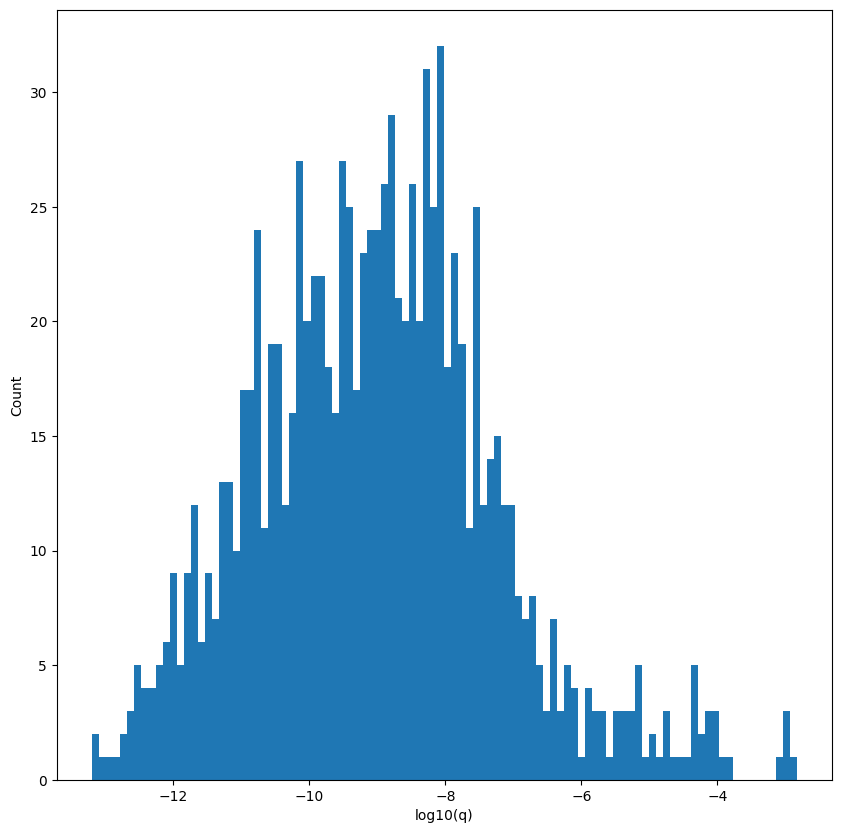

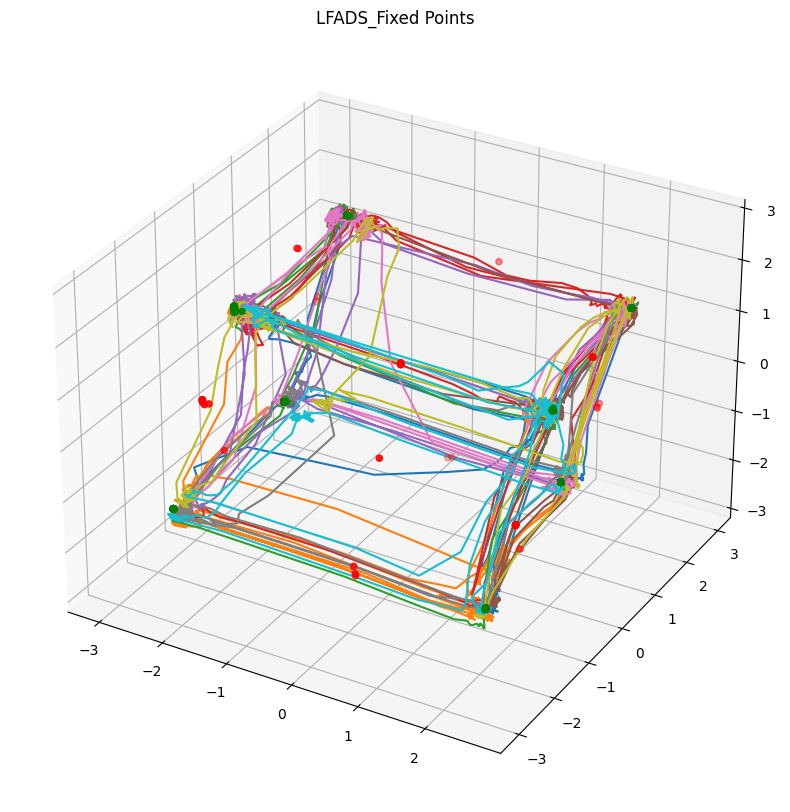


Iteration 500/10000
q = 3.43E-02 +/- 2.44E-02
dq = 1.13E-04 +/- 9.47E-05

Iteration 1000/10000
q = 1.14E-02 +/- 6.74E-03
dq = 1.77E-05 +/- 1.24E-05

Iteration 1500/10000
q = 6.15E-03 +/- 3.43E-03
dq = 6.16E-06 +/- 3.93E-06

Iteration 2000/10000
q = 4.00E-03 +/- 2.21E-03
dq = 2.98E-06 +/- 1.92E-06

Iteration 2500/10000
q = 2.86E-03 +/- 1.57E-03
dq = 1.78E-06 +/- 1.16E-06

Iteration 3000/10000
q = 2.12E-03 +/- 1.19E-03
dq = 1.21E-06 +/- 7.42E-07

Iteration 3500/10000
q = 1.60E-03 +/- 9.43E-04
dq = 8.86E-07 +/- 5.08E-07

Iteration 4000/10000
q = 1.22E-03 +/- 7.78E-04
dq = 6.74E-07 +/- 3.73E-07

Iteration 4500/10000
q = 9.22E-04 +/- 6.61E-04
dq = 5.15E-07 +/- 2.86E-07

Iteration 5000/10000
q = 6.97E-04 +/- 5.71E-04
dq = 3.91E-07 +/- 2.29E-07

Iteration 5500/10000
q = 5.25E-04 +/- 4.93E-04
dq = 3.04E-07 +/- 2.01E-07

Iteration 6000/10000
q = 3.89E-04 +/- 4.17E-04
dq = 2.45E-07 +/- 1.96E-07

Iteration 6500/10000
q = 2.78E-04 +/- 3.42E-04
dq = 1.98E-07 +/- 1.85E-07

Iteration 7000/10000
q = 

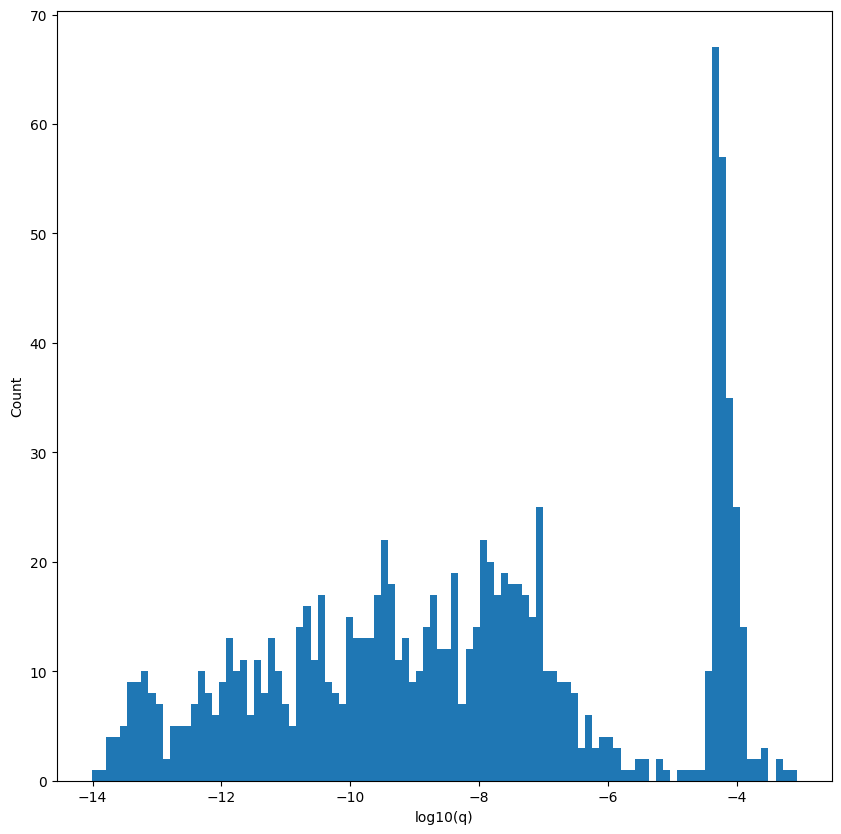

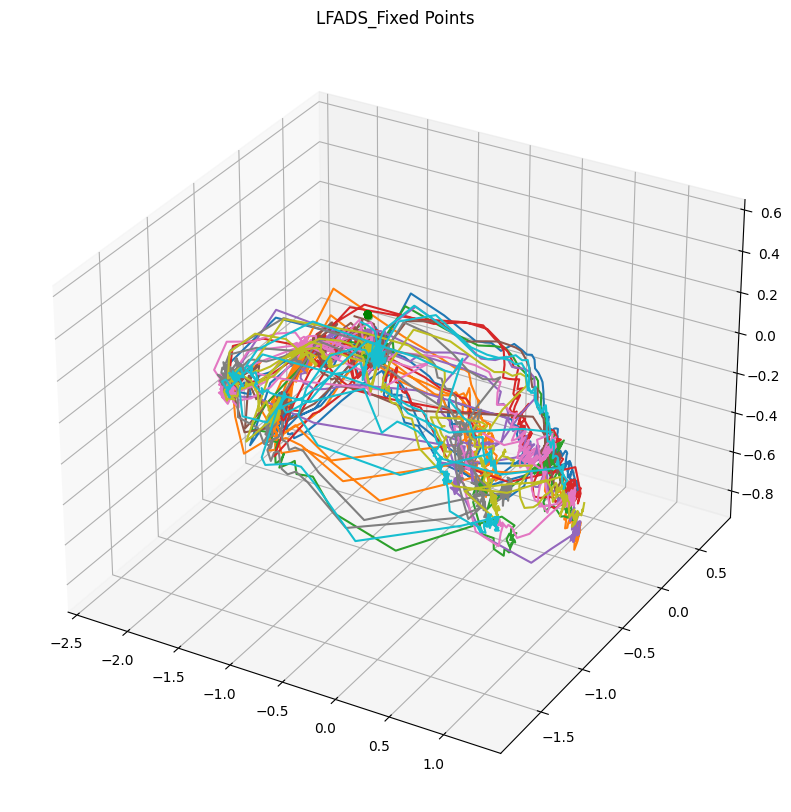

In [10]:
best_fps = best_model.plot_fps(inputs = torch.tensor(best_model_inputs_mean))
bad_fps = bad_model.plot_fps(inputs = torch.tensor(bad_model_inputs_mean))

In [37]:
best_xstar = best_fps.xstar
best_q = best_fps.qstar
bad_xstar = bad_fps.xstar
bad_q = bad_fps.qstar
best_stability = best_fps.is_stable
bad_stability = bad_fps.is_stable

best_xstar_pca = best_pca.transform(best_xstar)
bad_xstar_pca = bad_pca.transform(bad_xstar)

q_thresh = 1e-6
best_stable_flag = np.logical_and(best_q < q_thresh, best_stability)
best_q_inds_stable = np.where(best_stable_flag)
bad_stable_flag = np.logical_and(bad_q < q_thresh, bad_stability)
bad_q_inds_stable = np.where(bad_stable_flag)

best_unstable_flag = np.logical_and(best_q < q_thresh, np.logical_not(best_stability))
best_q_inds_unstable = np.where(best_unstable_flag)
bad_unstable_flag = np.logical_and(bad_q < q_thresh, np.logical_not(bad_stability))
bad_q_inds_unstable = np.where(bad_unstable_flag)




/tmp/ipykernel_2196610/4243810666.py:17: MatplotlibDeprecationWarning: The w_xaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use xaxis instead.
  ax.w_xaxis.line.set_color((1.0, 1.0, 1.0, 0.0))  # Make X-axis line invisible
/tmp/ipykernel_2196610/4243810666.py:18: MatplotlibDeprecationWarning: The w_yaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use yaxis instead.
  ax.w_yaxis.line.set_color((1.0, 1.0, 1.0, 0.0))  # Make Y-axis line invisible
/tmp/ipykernel_2196610/4243810666.py:19: MatplotlibDeprecationWarning: The w_zaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use zaxis instead.
  ax.w_zaxis.line.set_color((1.0, 1.0, 1.0, 0.0))  # Make Z-axis line invisible
/tmp/ipykernel_2196610/4243810666.py:48: MatplotlibDeprecationWarning: The w_xaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use xaxis instead.
  ax.w_xaxis.line.set_color((1.0, 1.0, 1.0, 0.0))  # Make X-axis lin

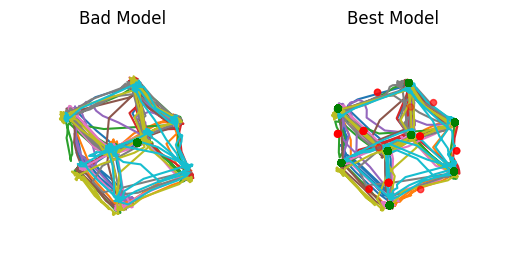

In [51]:
num_trials=  10

fig = plt.figure()
ax = fig.add_subplot(121, projection='3d')
for i in range(num_trials):
    ax.plot(bad_lats_pca[i,:,0], bad_lats_pca[i,:,1], bad_lats_pca[i,:,2])
ax.scatter(bad_xstar_pca[bad_q_inds_unstable,0], bad_xstar_pca[bad_q_inds_unstable, 1], bad_xstar_pca[bad_q_inds_unstable,2], c = "r")
ax.scatter(bad_xstar_pca[bad_q_inds_stable,0], bad_xstar_pca[bad_q_inds_stable, 1], bad_xstar_pca[bad_q_inds_stable,2], c = "g")
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])
ax.grid(False)
# Turn off the grey background grid
ax.xaxis.pane.set_edgecolor('w')
ax.yaxis.pane.set_edgecolor('w')
ax.zaxis.pane.set_edgecolor('w')
ax.w_xaxis.line.set_color((1.0, 1.0, 1.0, 0.0))  # Make X-axis line invisible
ax.w_yaxis.line.set_color((1.0, 1.0, 1.0, 0.0))  # Make Y-axis line invisible
ax.w_zaxis.line.set_color((1.0, 1.0, 1.0, 0.0))  # Make Z-axis line invisible
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])

ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
ax.view_init(elev=30, azim=-10)
ax.set_title("Bad Model")

best_lats = best_model.get_latents(phase = "val").detach().cpu().numpy()
ax = fig.add_subplot(122, projection='3d')
for i in range(num_trials):
    ax.plot(best_lats_pca[i,:,0], best_lats_pca[i,:,1], best_lats_pca[i,:,2])
ax.scatter(best_xstar_pca[best_q_inds_unstable,0], best_xstar_pca[best_q_inds_unstable, 1], best_xstar_pca[best_q_inds_unstable,2], c = "r")
ax.scatter(best_xstar_pca[best_q_inds_stable,0], best_xstar_pca[best_q_inds_stable, 1], best_xstar_pca[best_q_inds_stable,2], c = "g")
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])

ax.grid(False)
# Turn off the grey background grid
ax.xaxis.pane.set_edgecolor('w')
ax.yaxis.pane.set_edgecolor('w')
ax.zaxis.pane.set_edgecolor('w')
ax.w_xaxis.line.set_color((1.0, 1.0, 1.0, 0.0))  # Make X-axis line invisible
ax.w_yaxis.line.set_color((1.0, 1.0, 1.0, 0.0))  # Make Y-axis line invisible
ax.w_zaxis.line.set_color((1.0, 1.0, 1.0, 0.0))  # Make Z-axis line invisible

ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
ax.view_init(elev=30, azim=0)
ax.set_title("Best Model")

# Save as pdf
plt.savefig("FPFinding_latents_input_inf.pdf", format = "pdf")


In [64]:

def get_effective_impulses(x):
    """
    Takes in a BxTxN tensor of positive and negative input impulses and returns
    a tensor of the same shape containing only the effective impulses that flip
    the Nth bit of an N-bit flip-flop.

    Parameters:
    x (numpy.ndarray): Input tensor of shape (B, T, N) with values +1, -1, or 0.

    Returns:
    numpy.ndarray: Tensor of the same shape as x containing effective impulses.
    """
    B, T, N = x.shape
    s = np.zeros((B, N), dtype=int)  # Initialize states at t=0
    y = np.zeros_like(x)             # Initialize output tensor

    for t in range(T):
        x_t = x[:, t, :]             # Impulses at time t
        s_prev = s.copy()            # Previous states

        # Determine effective positive impulses (from 0 to 1)
        effective_pos = (s_prev == 0) & (x_t == 1)
        # Determine effective negative impulses (from 1 to 0)
        effective_neg = (s_prev == 1) & (x_t == -1)

        # Update states based on effective impulses
        s[effective_pos] = 1
        s[effective_neg] = 0

        # Record effective impulses in the output tensor
        y_t = np.zeros_like(x_t)
        y_t[effective_pos] = 1
        y_t[effective_neg] = -1

        y[:, t, :] = y_t             # Update output tensor at time t

    return y


dict_keys(['controlled', 'latents', 'actions', 'states', 'joints'])
(200, 500, 3)


[Text(0, -0.05, ''),
 Text(0, 0.0, ''),
 Text(0, 0.05, ''),
 Text(0, 0.10000000000000002, '')]

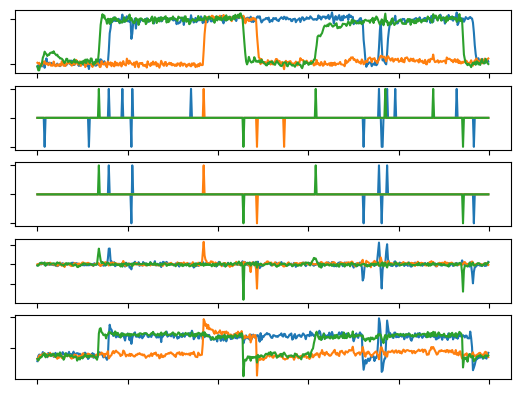

In [73]:

best_model_inputs = best_model.get_inferred_inputs(phase = "val")
bad_model_inputs = bad_model.get_inferred_inputs(phase = "val")
best_model_inputs = best_model_inputs.detach().cpu().numpy()
bad_model_inputs = bad_model_inputs.detach().cpu().numpy()

tt_outs = an_TT.get_model_outputs(phase = "val")
print(tt_outs.keys())
controlled =tt_outs["controlled"].detach().cpu().numpy()
tt_ins = an_TT.get_inputs(phase = "val").detach().cpu().numpy()
tt_true = an_TT.get_true_inputs(phase = "val").detach().cpu().numpy()
tt_effective = get_effective_impulses(tt_true)

lm_best = LinearRegression()
lm_best.fit(best_model_inputs.reshape(-1, best_model_inputs.shape[-1]), tt_effective.reshape(-1, tt_effective.shape[-1]))
best_model_inputs_pred = lm_best.predict(best_model_inputs.reshape(-1, best_model_inputs.shape[-1])).reshape(-1, best_model_inputs.shape[1], best_model_inputs.shape[2])

lm_bad = LinearRegression()
lm_bad.fit(bad_model_inputs.reshape(-1, bad_model_inputs.shape[-1]), tt_effective.reshape(-1, tt_effective.shape[-1]))
bad_model_inputs_pred = lm_bad.predict(bad_model_inputs.reshape(-1, bad_model_inputs.shape[-1])).reshape(-1, bad_model_inputs.shape[1], bad_model_inputs.shape[2])




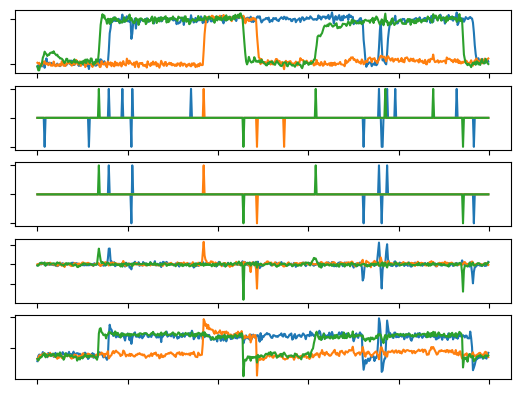

In [75]:

fig = plt.figure()
ax = fig.add_subplot(511)
ax.plot(controlled[0,:,0])
ax.plot(controlled[0,:,1])
ax.plot(controlled[0,:,2])
ax.set_xticklabels([])
ax.set_yticklabels([])

ax = fig.add_subplot(512)
ax.plot(tt_true[0,:,0])
ax.plot(tt_true[0,:,1])
ax.plot(tt_true[0,:,2])
ax.set_xticklabels([])
ax.set_yticklabels([])

ax = fig.add_subplot(513)
ax.plot(tt_effective[0,:,0])
ax.plot(tt_effective[0,:,1])
ax.plot(tt_effective[0,:,2])
ax.set_xticklabels([])
ax.set_yticklabels([])

ax = fig.add_subplot(514)
ax.plot(best_model_inputs_pred[0,:,0])
ax.plot(best_model_inputs_pred[0,:,1])
ax.plot(best_model_inputs_pred[0,:,2])
ax.set_xticklabels([])
ax.set_yticklabels([])

ax = fig.add_subplot(515)
ax.plot(bad_model_inputs_pred[0,:,0])
ax.plot(bad_model_inputs_pred[0,:,1])
ax.plot(bad_model_inputs_pred[0,:,2])
ax.set_xticklabels([])
ax.set_yticklabels([])

plt.savefig("FPFinding_inputs.pdf", format = "pdf")